<a href="https://colab.research.google.com/github/Ebenezer997/MNIST-data/blob/main/Digit_Recognizer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit Recognizer
Using Fundamentals computer vision with the famous MNIST data

In [ ]:
#Using the Kaggle API to fetch the dataset for this competition
!pip install kaggle
api_token = {"username":"ayisiebenezer","key":"0ef07d848287b3359f1a6cf8d13c7960"}
import json
import zipfile
import os
!mkdir /root/.kaggle
!echo '{"username":"USERNAME","key":"API_KEY"}' > /root/.kaggle/kaggle.json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!kaggle competitions download -c digit-recognizer


In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
# !mkdir /root/.kaggle
# !cp kaggle.json -/.kaggle/

# !chmod 600 -/.kaggle/kaggle.json





# api_token = {"username":"ayisiebenezer","key":"0ef07d848287b3359f1a6cf8d13c7960"}'}

# import json
# import zipfile
# import os
# !mkdir /root/.kaggle
# !echo '{"username": "USERNAME","key":"API_KEY"}'> /root/.kaggle/kaggle.json
# with open('/root/.kaggle/kaggle.json','w') as file:
#      json.dump(api_token, file)
# !kaggle competitions download -c digit-recognizer

In [ ]:
#Renaming files as certain issues are caused with the default ones
%%bash
mv /content/train.csv.zip /content/traincsv.zip
mv /content/test.csv.zip/ /content/test.csv.zip

mv: cannot stat '/content/test.csv.zip/': Not a directory


In [ ]:
#Unzipping training data
zip_ref = zipfile.ZipFile('/content/traincsv.zip','r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#unzipping test data
zip_ref = zipfile.ZipFile('/content/test.csv.zip','r')
zip_ref.extractall()
zip_ref.close()




In [ ]:
#making Dataframes
import pandas as pd
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')


In [ ]:
#importing numpy and tensorflow
import numpy as np
import tensorflow as tf

In [ ]:
#Training labels set
Y_train = train_data["label"]

#Drop 'label' column
X_train = train_data.drop(labels = ["label"],axis = 1)

In [ ]:
#Normalizing data for better performance
X_train = X_train/255.0
test_data = test_data/255.0

#Reshaping Data
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)


In [ ]:
#Splitting training data for training and validation
from sklearn.model_selection import train_test_split

X1_train,Y1_train,X2_train,Y2_train=train_test_split(X_train,Y_train,test_size = 0.1, random_state=2)

In [ ]:
#model architecture
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(28,28,1)),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
 tf.keras.layers.MaxPooling2D(2,2),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128,activation=tf.nn.relu),
 tf.keras.layers.Dropout(0.5),
 tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
results = model.evaluate(Y1_train,Y2_train, batch_size=32)

132/132 [==============================] - 7s 2ms/step - loss: 2.3038 - accuracy: 0.0674


In [ ]:
print("Fit model on training data")
history = model.fit(
    X1_train,
    X2_train,
    batch_size=32,
    epochs=15,
    validation_data=(Y1_train, Y2_train),
)

Fit model on training data
Epoch 1/15
1182/1182 [==============================] - 4s 3ms/step - loss: 0.5152 - accuracy: 0.8331 - val_loss: 0.1791 - val_accuracy: 0.9433
Epoch 2/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1727 - accuracy: 0.9492 - val_loss: 0.1088 - val_accuracy: 0.9686
Epoch 3/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1258 - accuracy: 0.9635 - val_loss: 0.1094 - val_accuracy: 0.9667
Epoch 4/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.1037 - accuracy: 0.9696 - val_loss: 0.0803 - val_accuracy: 0.9779
Epoch 5/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0901 - accuracy: 0.9739 - val_loss: 0.0794 - val_accuracy: 0.9750
Epoch 6/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0819 - accuracy: 0.9746 - val_loss: 0.0901 - val_accuracy: 0.9740
Epoch 7/15
1182/1182 [==============================] - 3s 3ms/step - loss: 0.0731 - accuracy: 0.9793 - val_l

<Figure size 432x288 with 0 Axes>

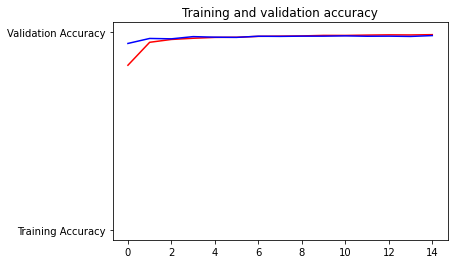

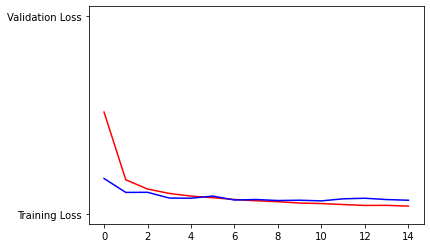

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
predicted_classes = model.predict_classes(test_data)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("submission.csv", index=False, header=True)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
#Kills google collab instance
import os, signal
os.kill(os.getpid(), signal.SIGKILL)